## Visualization for task 2.1 and 2.2

In [1]:
from string import ascii_letters
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from Munsell import *

y_list = ['A','B','C','D','E','F','G','H','I','J'] 
x_list = ['0','1','2','3','4','5','6','7','8','9','10',
          '11','12','13','14','15','16','17','18','19','20',
          '21','22','23','24','25','26','27','28','29','30',
          '31','32','33','34','35','36','37','38','39','40']
HUE_TABLE = [[251,63,1],
             [251,85,1],
             [255,124,0],
             [255,164,0],
             [255,201,0],
             [255,247,0],
             [201,255,0],
             [150,255,0],
             [109,255,0],
             [50,255,0],
             [0,255,66],
             [0,255,100],
             [0,255,150],
             [0,255,211],
             [0,206,255],
             [0,160,255],
             [0,102,255],
             [0,50,255],
             [0,0,255],
             [50,0,255],
             [114,0,255],
             [152,0,255],
             [200,0,255],
             [255,0,249],
             [255,0,200],
             [255,0,150],
             [255,0,100],
             [255,0,50],
             [255,50,50],
             [255,100,50],
             [255,150,50]]

chip_list = []
for y in y_list:
    for x in x_list:
        chip_list.append(y+x)


data_origin = {'language_ID': [],
              'speaker_ID':[],
              'response_ID':[],
              'response_term':[],
              'chip_ID':[]}
with open('foci-exp.txt','r') as f:
    for line in f:
        line_content = line.split()
        data_origin['language_ID'].append(line_content[0])
        data_origin['speaker_ID'].append(line_content[1])
        data_origin['response_ID'].append(line_content[2])
        data_origin['response_term'].append(line_content[3])
        data_origin['chip_ID'].append(line_content[4])

data_df = pd.DataFrame(data_origin)

def chip_to_pos(chip):
    y_pos = y_list.index(chip[0])
    x_pos = x_list.index(chip[1:])
    return (y_pos, x_pos-1)


In [2]:
# ================= Some fundamental observations on data for one langauge ==== 
def different_classes(data_lang, out_cut=0):
    # ================ Bad example: 太多outlier 导致图像混乱 ===============================
    # ================ Good example: count小于30的不计入统计 ===============================
    show_matrix = np.zeros((10,40,3))
    mask = data_lang['response_term'].value_counts()>out_cut
    lang_terms = data_lang['response_term'].value_counts().keys()[mask]

    color_idx = 0
    for terms in lang_terms:
        data_lang_with_term = data_lang[data_lang['response_term']==terms]
        sample_chip = data_lang_with_term['chip_ID'].tolist()[0]
        for chip in data_lang_with_term['chip_ID']:
            x_pos, y_pos = chip_to_pos(chip)
            show_matrix[x_pos, y_pos] = MUNSELL_TABLE[chip_to_pos(sample_chip)]
        color_idx += 1
    return show_matrix, lang_terms

## 1. Figures for Chip's View

1. All other terms are black background, with only one (111) or two terms (112).
2. See all the languages, black background. Language with reasonable many term types (121) and with too many term types (122).
3. Interpolate following lightness (131) and following hue (132)

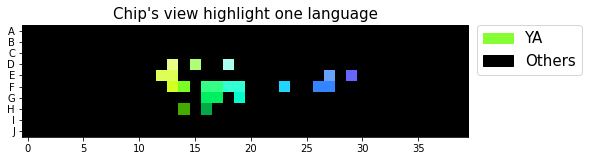

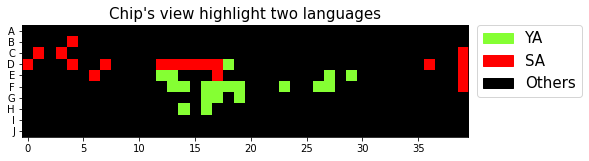

In [3]:
# ================ All other black =====================
data_lang = data_df[data_df['language_ID']=='6']


show_matrix_111 = np.zeros((10,40,3))

lang_terms = data_lang['response_term'].value_counts().keys()
color_idx = 0
data_lang_with_term = data_lang[data_lang['response_term']==lang_terms[7]]
for chip in data_lang_with_term['chip_ID']:
    x_pos, y_pos = chip_to_pos(chip)
    show_matrix_111[x_pos, y_pos] = MUNSELL_TABLE[x_pos,y_pos]    

LABELS = ['YA','Others']
data = show_matrix_111/255
plt.figure(figsize=(8,4))
fig1 = plt.subplot(111)
im = plt.imshow(data, interpolation='none')
colors = np.asarray([MUNSELL_TABLE[4,15], np.zeros(3)])/255
patches = [mpatches.Patch(color=colors[i],label=LABELS[i]) for i in range(2)]
#fig1.set_xticks(np.arange(len(x_list)))
fig1.set_yticks(np.arange(len(y_list))) 
fig1.set_yticklabels(y_list) 
plt.legend(handles=patches, bbox_to_anchor=(1.02,1),loc=2,borderaxespad=0.,fontsize=15)
plt.title("Chip's view highlight one language",fontsize=15)
plt.show()

show_matrix_112 = np.zeros((10,40,3))
lang_terms = data_lang['response_term'].value_counts().keys()
color_idx = 0
data_lang_with_term = data_lang[data_lang['response_term']==lang_terms[7]]
for chip in data_lang_with_term['chip_ID']:
    x_pos, y_pos = chip_to_pos(chip)
    show_matrix_112[x_pos, y_pos] = MUNSELL_TABLE[4,15]
    
data_lang_with_term = data_lang[data_lang['response_term']==lang_terms[8]]
for chip in data_lang_with_term['chip_ID']:
    x_pos, y_pos = chip_to_pos(chip)
    show_matrix_112[x_pos, y_pos] = MUNSELL_TABLE[6,1]
    

LABELS = ['YA','SA','Others']
data = show_matrix_112/255
plt.figure(figsize=(8,4))
fig2 = plt.subplot(111)
fig2.set_yticks(np.arange(len(y_list))) 
fig2.set_yticklabels(y_list) 
im = plt.imshow(data, interpolation='none')
colors = np.asarray([MUNSELL_TABLE[4,15],MUNSELL_TABLE[6,1], np.zeros(3)])/255
patches = [mpatches.Patch(color=colors[i],label=LABELS[i]) for i in range(3)]
plt.legend(handles=patches, bbox_to_anchor=(1.02,1),loc=2,borderaxespad=0.,fontsize=15)
plt.title("Chip's view highlight two languages",fontsize=15)
plt.show()

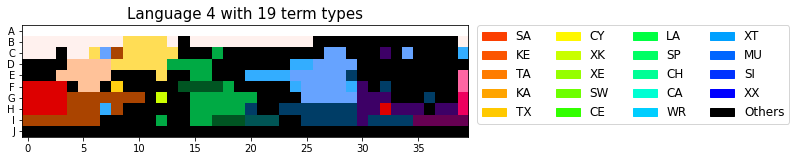

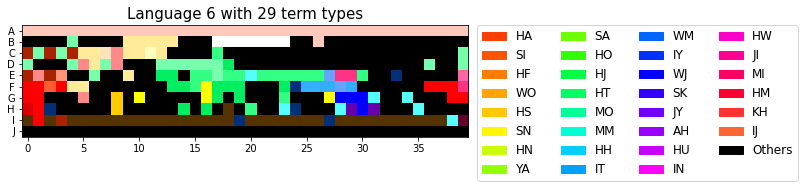

In [4]:
data_lang121 = data_df[data_df['language_ID']=='4']
show_matrix_121, terms_121 = different_classes(data_lang121, out_cut=0)


LABELS = terms_121.tolist()
LABELS.append('Others')
data = show_matrix_121/255
plt.figure(figsize=(8,4))
fig2 = plt.subplot(111)
fig2.set_yticks(np.arange(len(y_list))) 
fig2.set_yticklabels(y_list) 
im = plt.imshow(data, interpolation='none')
colors = HUE_TABLE[:len(terms_121)]
colors.append([0,0,0])
colors = np.asarray(colors)/255
patches = [mpatches.Patch(color=colors[i],label=LABELS[i]) for i in range(len(terms_121)+1)]
plt.legend(handles=patches, bbox_to_anchor=(1.02,1),loc=2,ncol=4,borderaxespad=0.,fontsize=12)
plt.title("Language 4 with 19 term types",fontsize=15)
plt.show()



data_lang122 = data_df[data_df['language_ID']=='6']
show_matrix_122, terms_122 = different_classes(data_lang122, out_cut=0)


LABELS = terms_122.tolist()
LABELS.append('Others')
data = show_matrix_122/255
plt.figure(figsize=(8,4))
fig2 = plt.subplot(111)
fig2.set_yticks(np.arange(len(y_list))) 
fig2.set_yticklabels(y_list) 
im = plt.imshow(data, interpolation='none')
colors = HUE_TABLE[:len(terms_122)]
colors.append([0,0,0])
colors = np.asarray(colors)/255
patches = [mpatches.Patch(color=colors[i],label=LABELS[i]) for i in range(len(terms_122)+1)]
plt.legend(handles=patches, bbox_to_anchor=(1.02,1),loc=2,ncol=4,borderaxespad=0.,fontsize=12)
plt.title("Language 6 with 29 term types",fontsize=15)
plt.show()


In [5]:
def different_classes(data_lang, out_cut=0):
    show_matrix = np.zeros((10,41,3))
    mask = data_lang['response_term'].value_counts()>out_cut
    lang_terms = data_lang['response_term'].value_counts().keys()[mask]

    color_idx = 0
    for terms in lang_terms:
        data_lang_with_term = data_lang[data_lang['response_term']==terms]
        for chip in data_lang_with_term['chip_ID']:
            x_pos, y_pos = chip_to_pos(chip)
            color_sel = np.mod(color_idx,len(HUE_TABLE))
            show_matrix[x_pos, y_pos] = HUE_TABLE[color_sel]
        color_idx += 1
    return show_matrix, lang_terms

def find_nearest_nonempty(vector,x):
    dist = 0
    while dist<len(vector):
        dist += 1
        left = np.mod(x-dist,len(vector))
        right= np.mod(x+dist,len(vector))
        if vector[left]!=0:
            return left
        elif vector[right]!=0:
            return right
    return x


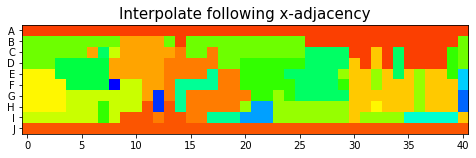

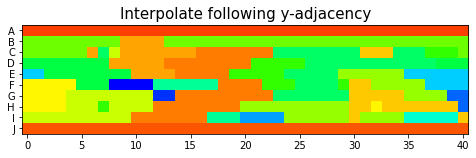

In [6]:
data_lang = data_df[data_df['language_ID']=='4']
show_matrix_131, terms_131 = different_classes(data_lang,0)

import copy
origin_matrix_131 = copy.deepcopy(show_matrix_131)
for x in range(41):
    for y in range(10):
        if show_matrix_131[y,x,:].sum()==0:            
            copy_y = find_nearest_nonempty(origin_matrix_131[:,x,:].sum(1),y)          
            show_matrix_131[y,x,:] = show_matrix_131[copy_y,x,:]

LABELS = terms_131.tolist()
data = show_matrix_131/255
plt.figure(figsize=(8,4))
fig2 = plt.subplot(111)
fig2.set_yticks(np.arange(len(y_list))) 
fig2.set_yticklabels(y_list) 
im = plt.imshow(data, interpolation='none')
colors = HUE_TABLE[:len(terms_131)]
colors.append([0,0,0])
colors = np.asarray(colors)/255
patches = [mpatches.Patch(color=colors[i],label=LABELS[i]) for i in range(len(terms_131))]
#plt.legend(handles=patches, bbox_to_anchor=(1.02,1),loc=2,ncol=4,borderaxespad=0.,fontsize=12)
plt.title("Interpolate following x-adjacency",fontsize=15)
plt.show()


data_lang = data_df[data_df['language_ID']=='4']
show_matrix_132, terms_132 = different_classes(data_lang,0)


origin_matrix = copy.deepcopy(show_matrix_132)
for x in range(41):
    for y in range(10):
        if show_matrix_132[y,x,:].sum()==0:            
            copy_x = find_nearest_nonempty(origin_matrix[y].sum(1),x)          
            show_matrix_132[y,x,:] = show_matrix_132[y,copy_x,:]

LABELS = terms_131.tolist()
data = show_matrix_132/255
plt.figure(figsize=(8,4))
fig2 = plt.subplot(111)
fig2.set_yticks(np.arange(len(y_list))) 
fig2.set_yticklabels(y_list) 
im = plt.imshow(data, interpolation='none')
colors = HUE_TABLE[:len(terms_131)]
colors.append([0,0,0])
colors = np.asarray(colors)/255
patches = [mpatches.Patch(color=colors[i],label=LABELS[i]) for i in range(len(terms_131))]
#plt.legend(handles=patches, bbox_to_anchor=(1.02,1),loc=2,ncol=4,borderaxespad=0.,fontsize=12)
plt.title("Interpolate following y-adjacency",fontsize=15)
plt.show()


## Chip's view, see the topological similarity

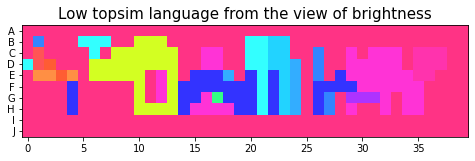

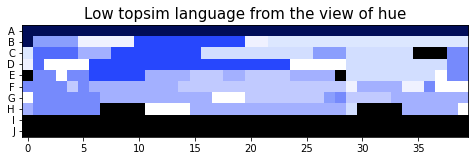

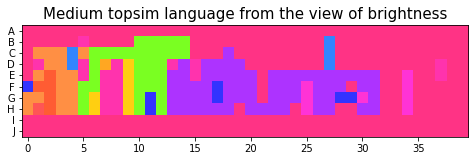

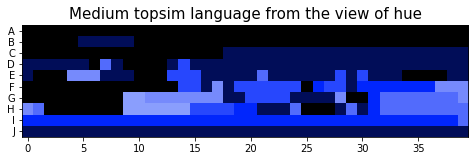

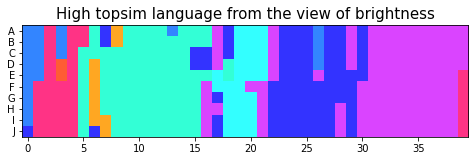

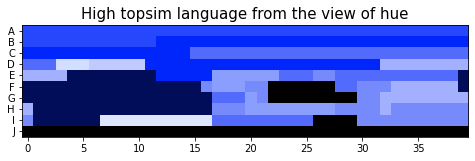

In [11]:
ALPHA_TABLE = [[255,255,255],
               [239,241,255],
               [220,231,255],
               [210,222,255],
               [193,202,255],
               [163,176,255],
               [138,158,253],
               [118,138,252],
               [82,107,252],
               [39,71,253],
               [1,38,252],
               #[0,26,172],
               #[1,16,107],
               [1,13,88],
               #[0,10,65],
               #[0,6,40],
               [0,0,0]]
ALPHA_TABLE = ALPHA_TABLE[::-1]
x_list = x_list[:-1]

def get_term_types(lang_terms):
    pos1 = []
    pos2 = []
    for term in lang_terms:
        if len(term)!=2:
            term = [term,term]
        if term[0] not in pos1:
            pos1.append(term[0])
        if term[1] not in pos2:
            pos2.append(term[1])
    return pos1, pos2

def gen_show_matrix_topsim_onecolor(data_lang, xty='xy'):
    show_matrix = np.zeros((10,40,3))
    lang_terms = data_lang['response_term'].value_counts().keys()
    pos1_list, pos2_list =  get_term_types(lang_terms)
    
    if xty=='xy':
        for x in range(len(x_list)):
            for y in range(len(y_list)):
                chip_ID = y_list[y]+x_list[x]
                mask = data_lang['chip_ID']==chip_ID
                if mask.sum()>0:
                    term = data_lang[mask]['response_term'].value_counts().keys()[0]
                    color_idx = pos1_list.index(term[0])            # When term[0] different
                    if color_idx>=len(ALPHA_TABLE):
                        color_idx = -1
                    #color_idx = pos2_list.index(term[1])
                    tmp_color = ALPHA_TABLE[color_idx]
                    show_matrix[y,x,:]=tmp_color
                else:
                    show_matrix[y,x]=tmp_color
        return show_matrix
    elif xty=='yx':
        for y in range(len(y_list)):
            for x in range(len(x_list)):
                chip_ID = y_list[y]+x_list[x]
                mask = data_lang['chip_ID']==chip_ID
                if mask.sum()>0:
                    term = data_lang[mask]['response_term'].value_counts().keys()[0]
                    color_idx = pos1_list.index(term[0])            # When term[0] different
                    if color_idx>=len(ALPHA_TABLE):
                        color_idx = -1
                    #color_idx = pos2_list.index(term[1])
                    tmp_color = ALPHA_TABLE[color_idx]
                    show_matrix[y,x,:]=tmp_color
                else:
                    show_matrix[y,x]=tmp_color
        return show_matrix 
    else:
        print('xty should be xy or yx')

        
def gen_show_matrix_topsim_munsell(data_lang, xty='xy'):
    show_matrix = np.zeros((10,40,3))
    lang_terms = data_lang['response_term'].value_counts().keys()
    pos1_list, pos2_list =  get_term_types(lang_terms)

    if xty=='xy':
        term_color_mapping = {}
        for x in range(len(x_list)):
            for y in range(len(y_list)):
                chip_ID = y_list[y]+x_list[x]
                mask = data_lang['chip_ID']==chip_ID
                if mask.sum()>0:
                    term = data_lang[mask]['response_term'].value_counts().keys()[0] 
                    color_idx = int(x_list[x])
                    tmp_color = MUNSELL_TABLE[5,color_idx]
                    term_color_mapping[term] = tmp_color

        for x in range(len(x_list)):
            for y in range(len(y_list)):
                chip_ID = y_list[y]+x_list[x]
                mask = data_lang['chip_ID']==chip_ID
                if mask.sum()>0:
                    term = data_lang[mask]['response_term'].value_counts().keys()[0]
                    term_color = term_color_mapping[term]
                    show_matrix[y,x,:]=term_color
                else:
                    show_matrix[y,x]=term_color  
        return show_matrix        
    elif xty=='yx':   
        term_color_mapping = {}
        for y in range(len(y_list)):
            for x in range(len(x_list)):
                chip_ID = y_list[y]+x_list[x]
                mask = data_lang['chip_ID']==chip_ID
                if mask.sum()>0:
                    term = data_lang[mask]['response_term'].value_counts().keys()[0] 
                    color_idx = int(x_list[x])
                    tmp_color = MUNSELL_TABLE[5,color_idx]
                    term_color_mapping[term] = tmp_color

        for y in range(len(y_list)):
            for x in range(len(x_list)):
                chip_ID = y_list[y]+x_list[x]
                mask = data_lang['chip_ID']==chip_ID
                if mask.sum()>0:
                    term = data_lang[mask]['response_term'].value_counts().keys()[0]
                    term_color = term_color_mapping[term]
                    show_matrix[y,x,:]=term_color
                else:
                    show_matrix[y,x]=term_color  
        return show_matrix
    else:
        print('xty should be xy or yx')

def draw_figure_topsim(show_matrix, title):
    data = show_matrix/255
    plt.figure(figsize=(8,4))
    fig2 = plt.subplot(111)
    fig2.set_yticks(np.arange(len(y_list))) 
    fig2.set_yticklabels(y_list) 
    im = plt.imshow(data, interpolation='none')
    plt.title(title,fontsize=15)
    plt.show()

data_lang = data_df[data_df['language_ID']=='103']
show_matrix_xy103 = gen_show_matrix_topsim_munsell(data_lang,'xy')
show_matrix_yx103 = gen_show_matrix_topsim_onecolor(data_lang,'yx')
draw_figure_topsim(show_matrix_xy103,'Low topsim language from the view of brightness')
draw_figure_topsim(show_matrix_yx103,'Low topsim language from the view of hue')

data_lang = data_df[data_df['language_ID']=='6']
show_matrix_xy6 = gen_show_matrix_topsim_munsell(data_lang,'xy')
show_matrix_yx6 = gen_show_matrix_topsim_onecolor(data_lang,'yx')
draw_figure_topsim(show_matrix_xy6,'Medium topsim language from the view of brightness')
draw_figure_topsim(show_matrix_yx6,'Medium topsim language from the view of hue')

data_lang = data_df[data_df['language_ID']=='87']
show_matrix_xy87 = gen_show_matrix_topsim_munsell(data_lang,'xy')
show_matrix_yx87 = gen_show_matrix_topsim_onecolor(data_lang,'yx')
draw_figure_topsim(show_matrix_xy87,'High topsim language from the view of brightness')
draw_figure_topsim(show_matrix_yx87,'High topsim language from the view of hue')

## 2. Figures from term's view

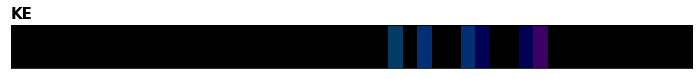

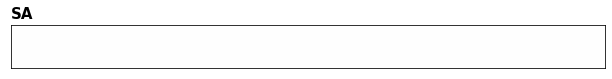

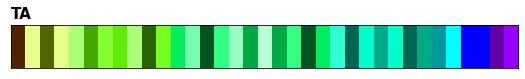

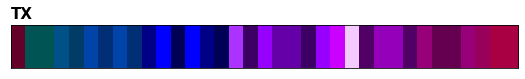

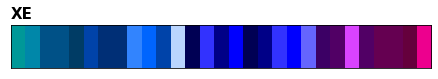

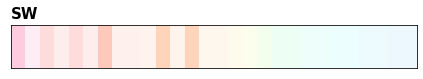

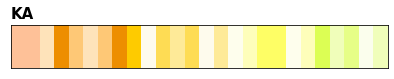

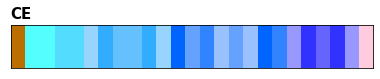

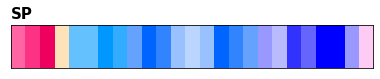

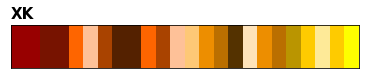

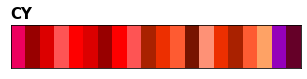

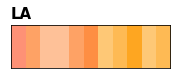

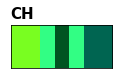

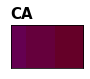

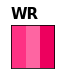

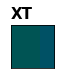

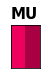

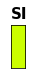

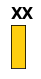

In [13]:
x_list.append('40')
def draw_figures_termview(data_lang, cut_off=0):
    all_terms = data_lang['response_term'].value_counts().keys()
    term_chips_mapping = {}
    for term in all_terms:
        chips_for_one_term = data_lang[data_lang['response_term']==term]['chip_ID'].value_counts().keys().tolist()
        term_chips_mapping[term] = chips_for_one_term

    # ----- Sort by represented chips ----------
    tmp_chip_cnt = []
    for key in term_chips_mapping:
        tmp_chip_cnt.append(len(term_chips_mapping[key]))
    sort_mask = np.asarray(tmp_chip_cnt).argsort()[::-1]

    for i in range(len(sort_mask)):
        show_list = []
        target_term = all_terms[sort_mask[i]]
        xy_pos_dict = {
                'y_pos':[],
                'x_pos':[]
                }
        for chip in term_chips_mapping[target_term]:
            y_pos, x_pos = chip_to_pos(chip)
            xy_pos_dict['y_pos'].append(y_pos)
            xy_pos_dict['x_pos'].append(x_pos)

        xy_pos_pd = pd.DataFrame(xy_pos_dict)
        xy_pos_pd_sorted = xy_pos_pd.sort_values(axis=0,ascending=True,by=['x_pos'])
        for idx in xy_pos_pd_sorted.index:
            tmp_xypos = xy_pos_pd_sorted.loc[idx]
            color_vector = MUNSELL_TABLE[tmp_xypos[0],tmp_xypos[1]]
            show_list.append(color_vector)

        show_matrix = np.asarray([show_list,show_list,show_list])

        plt.figure(figsize=(len(show_list)*0.4,0.8))
        im = plt.imshow(show_matrix/256, interpolation='none')
        plt.xticks([])
        plt.yticks([])
        plt.title(target_term,loc='left',fontsize=15,fontweight='bold')
        plt.show()

data_lang = data_df[data_df['language_ID']=='4']
draw_figures_termview(data_lang)   